In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data from https://archive.ics.uci.edu/ml/datasets/Spambase
spamdata = pd.read_csv('./spamdata.csv', header=None, index_col=None)

In [3]:
# TODO: implement adaptive learning rate
learning_rate = .00006

In [4]:
# relu activation function
def relu(input):
    return np.maximum(0, input)

# derivative of relu activation function
def drelu(input):
    return np.where(input > 0, 1, 0)

# sigmoid activation function
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# derivative of sigmoid activation function
def dsigmoid(input):
    return input * (1 - input)

In [5]:
# initialize weights
weights_1 = np.random.randn(58,3)*np.sqrt(2/61)
weights_2 = np.random.randn(4,1)*np.sqrt(2/5)

In [6]:
# takes in the inputs and adjusts the weights accordingly
def train(batch, target_outputs):
    global weights_1
    global weights_2
    
    # initialize bias
    hidden_1_bias = np.ones((batch.shape[0], 1))
    output_bias = np.ones((batch.shape[0], 1))

    ## feedforward
    input_with_bias = np.concatenate((batch, hidden_1_bias), axis=1)
    layer_1_output = relu(np.dot(input_with_bias, weights_1))
    layer_1_with_bias = np.concatenate((layer_1_output, hidden_1_bias), axis=1)

    nn_output = sigmoid(np.dot(layer_1_with_bias, weights_2))

    ## backprop
    # output layer
    nn_output_error = np.subtract(target_outputs, nn_output)
    nn_output_delta = nn_output_error * dsigmoid(nn_output)

    # hidden layer 1
    weights_2_without_bias = np.delete(weights_2, weights_2.shape[0] - 1, 0)
    layer_1_error = np.dot(nn_output_delta, weights_2_without_bias.T)
    layer_1_delta = layer_1_error * drelu(layer_1_output)

    # update weights
    weights_2 += np.dot(layer_1_with_bias.T, nn_output_delta) * learning_rate
    weights_1 += np.dot(input_with_bias.T, layer_1_delta) * learning_rate
    return nn_output_error

In [7]:
error_list = []
index = []
batches = []

# TODO: define train, validation, and test data sets
while len(spamdata) >= 100 :
    sample = spamdata.sample(n=100)
    batches.append(sample)
    spamdata = spamdata.drop(sample.index)
batches.append(spamdata)
    
for i in range(4500):
    mses = []
    for batch in batches:
        target_outputs = (batch.iloc[:,-1]).values.reshape(-1, 1)
        nn_error = train(batch.drop(spamdata.columns[-1],axis=1).values, target_outputs)
        mses.append(np.sum(nn_error * nn_error)/nn_error.shape[0])
    avg_mse = sum(mses) / len(mses)
    error_list.append(avg_mse)
    index.append(i)
    if (i % 500) == 0:
        print(avg_mse)

0.5929138843800629


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


0.15429463658497924
0.1433659387458906
0.12950884274995103
0.10961251840909625
0.11369559747661165
0.09238821577736597
0.09146615909560425
0.09079096623095777


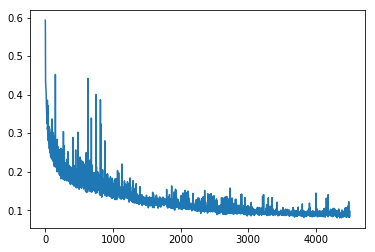

In [8]:
# plot mse vs. epoch
plt.plot(index, error_list)
plt.show()